In [1]:
import pandas as pd
import numpy as np
import os
from src.util import detect_outliers_zscore
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/togo-dapaong_qc.csv")

In [4]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

# Summery Of Statistics

In [6]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [8]:
df.isnull().sum() # only comments has missing values like the other 2 countries

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [9]:
df.isnull().sum() / len(df) * 100  # percentage of missing values ( comments have 100% missing values)

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

# Outlier Detection

In [10]:
# there are outliers in the solar radiations columns since they can not be less than zero
outlier_indices = detect_outliers_zscore(df, ['GHI', 'DNI', 'DHI'])
print(f"Outlier indices: {outlier_indices}")

Outlier indices: [False False False ... False False False]


In [11]:
# Set small negative values to 0 (between -10 and 0)
df.loc[(df['GHI'] < 0) & (df['GHI'] > -10), 'GHI'] = 0
df.loc[(df['DNI'] < 0) & (df['DNI'] > -10), 'DNI'] = 0
df.loc[(df['DHI'] < 0) & (df['DHI'] > -10), 'DHI'] = 0

# Drop extreme negative outliers (less than -10)
df = df[(df['GHI'] > -10) & (df['DNI'] > -10) & (df['DHI'] > -10)]

In [12]:
df[['GHI', 'DNI', 'DHI']].lt(0).sum() # solar radiation cleaned 

GHI    0
DNI    0
DHI    0
dtype: int64

In [13]:
# RH has to be between 0 and 100
df = df[(df["RH"] >= 0 ) & (df["RH"] <= 100)]

In [14]:
df["RH"].count()

np.int64(525594)

In [15]:
df[df["RH"] >= 0].count() # all RH values are now between 0 and 100

Timestamp        525594
GHI              525594
DNI              525594
DHI              525594
ModA             525594
ModB             525594
Tamb             525594
RH               525594
WS               525594
WSgust           525594
WSstdev          525594
WD               525594
WDstdev          525594
BP               525594
Cleaning         525594
Precipitation    525594
TModA            525594
TModB            525594
Comments              0
dtype: int64

In [16]:
# Outlier detection for sensor readings (ModA, ModB) and wind speed data (WS, WSgust).
# using z-score method
cols_to_check = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
outlier_rows = detect_outliers_zscore(df, cols_to_check)
print(f"Number of rows with outliers: {outlier_rows.sum()}")

# remove outliers
df_clean = df[~outlier_rows].copy()

Number of rows with outliers: 9255


In [17]:
df_clean.describe() # final clean dataset

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,516339.000000,0.0
mean,225.030474,147.970083,112.778093,219.372045,213.019459,27.727433,55.182666,2.312148,3.154201,0.548045,162.127677,10.491448,975.893928,0.000529,0.000952,32.312202,33.378376,NaN
std,316.449819,247.677152,151.568181,311.842307,302.612930,4.757364,28.698486,1.377979,1.762171,0.252823,92.028632,5.915080,2.147340,0.022988,0.018621,10.957089,12.718446,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,26.800000,1.400000,1.900000,0.400000,74.700000,6.800000,975.000000,0.000000,0.000000,23.800000,23.600000,NaN
50%,0.500000,0.000000,1.500000,2.800000,2.800000,27.200000,59.400000,2.200000,2.900000,0.500000,200.200000,10.700000,976.000000,0.000000,0.000000,28.200000,28.200000,NaN
75%,423.200000,237.900000,211.600000,404.100000,393.100000,31.000000,81.000000,3.200000,4.100000,0.700000,233.700000,14.000000,977.000000,0.000000,0.000000,40.300000,42.600000,NaN
max,1196.000000,904.100000,586.000000,1171.200000,1143.000000,41.400000,99.800000,6.700000,8.800000,2.700000,360.000000,86.900000,983.000000,1.000000,1.800000,70.400000,94.600000,NaN


In [18]:
df_clean.to_csv("./data/togo-dapaong-clean.csv", index=False)

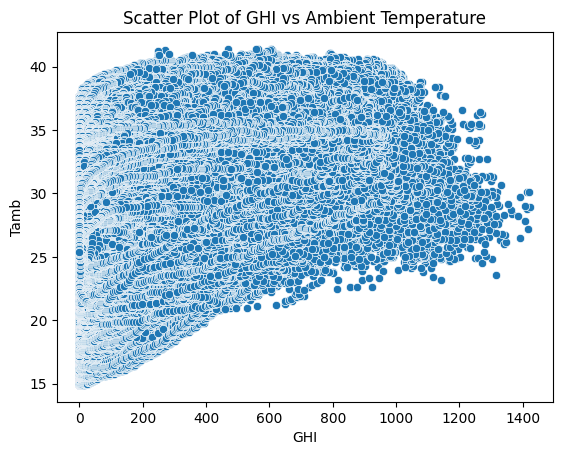

In [19]:
import seaborn as sns
sns.scatterplot(x='GHI', y='Tamb', data=df)
plt.title('Scatter Plot of GHI vs Ambient Temperature')
plt.show()

(array([5.4000e+01, 2.1500e+02, 3.8800e+02, 8.0900e+02, 1.0130e+03,
        1.5000e+03, 2.4460e+03, 2.6150e+03, 3.8670e+03, 4.0290e+03,
        5.1920e+03, 4.3050e+03, 5.6800e+03, 8.1100e+03, 1.0090e+04,
        1.7215e+04, 2.0768e+04, 2.6311e+04, 1.9849e+04, 2.2698e+04,
        2.1223e+04, 1.9525e+04, 1.4189e+04, 1.5970e+04, 1.4192e+04,
        1.0380e+04, 1.1282e+04, 1.1238e+04, 9.7560e+03, 7.6950e+03,
        8.4780e+03, 7.7230e+03, 7.0140e+03, 5.2080e+03, 6.3960e+03,
        5.6670e+03, 5.5870e+03, 4.4790e+03, 4.9940e+03, 4.7760e+03,
        3.8730e+03, 4.8730e+03, 4.6900e+03, 4.7940e+03, 3.9890e+03,
        4.8380e+03, 5.0580e+03, 5.0200e+03, 4.3650e+03, 5.1490e+03,
        5.3430e+03, 4.5220e+03, 5.4320e+03, 5.5660e+03, 5.2440e+03,
        4.2590e+03, 4.9770e+03, 5.0520e+03, 4.8880e+03, 3.9350e+03,
        4.8230e+03, 4.4560e+03, 3.5940e+03, 3.9990e+03, 4.1150e+03,
        3.8660e+03, 3.0600e+03, 3.6000e+03, 3.4850e+03, 3.4120e+03,
        2.6440e+03, 2.9540e+03, 2.7130e+03, 2.62

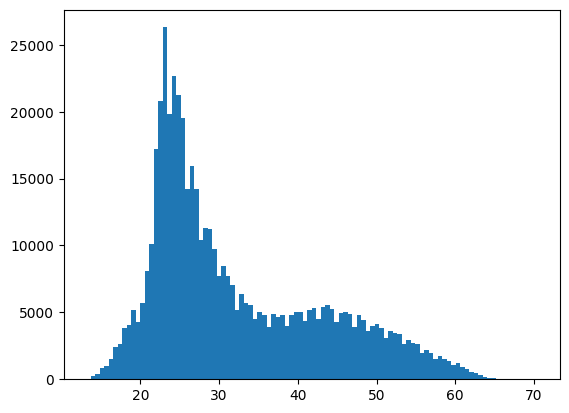

In [20]:
# checking if temperature is realistic
plt.hist(df_clean["TModA"], bins=100)

# Time Series Analysis

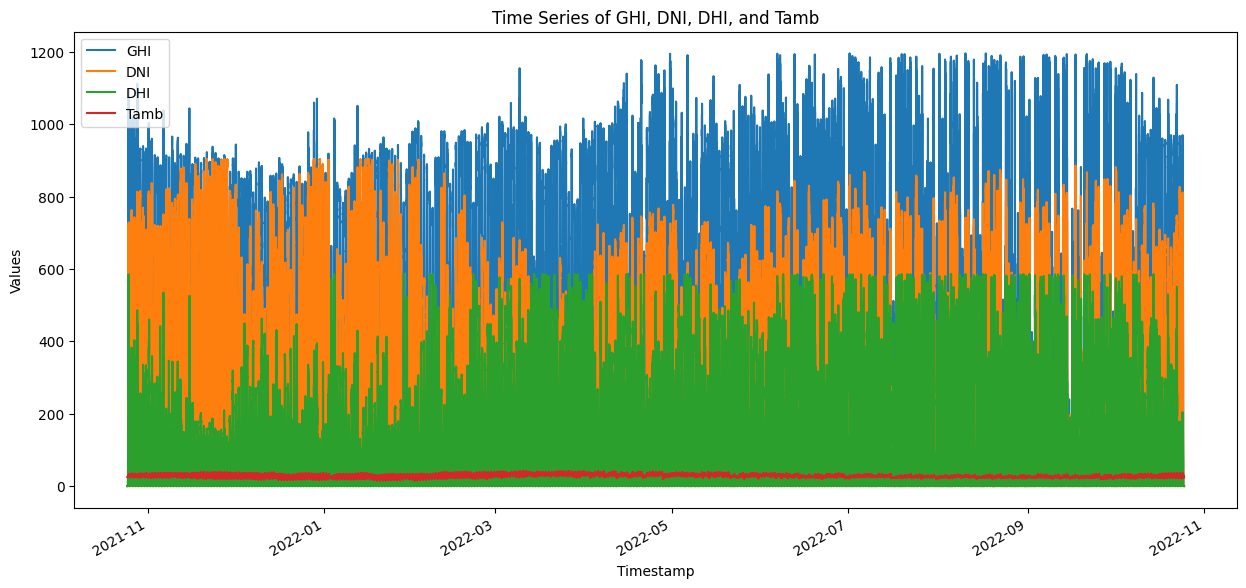

In [21]:
# Line chart of GHI, DNI, DHI, Tamb vs. Timestamp.
clean_df = df_clean.copy()
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 7))
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

C:\Users\Abel Tesfa\AppData\Local\Temp\ipykernel_9044\3776864059.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_clean.resample('M').mean()


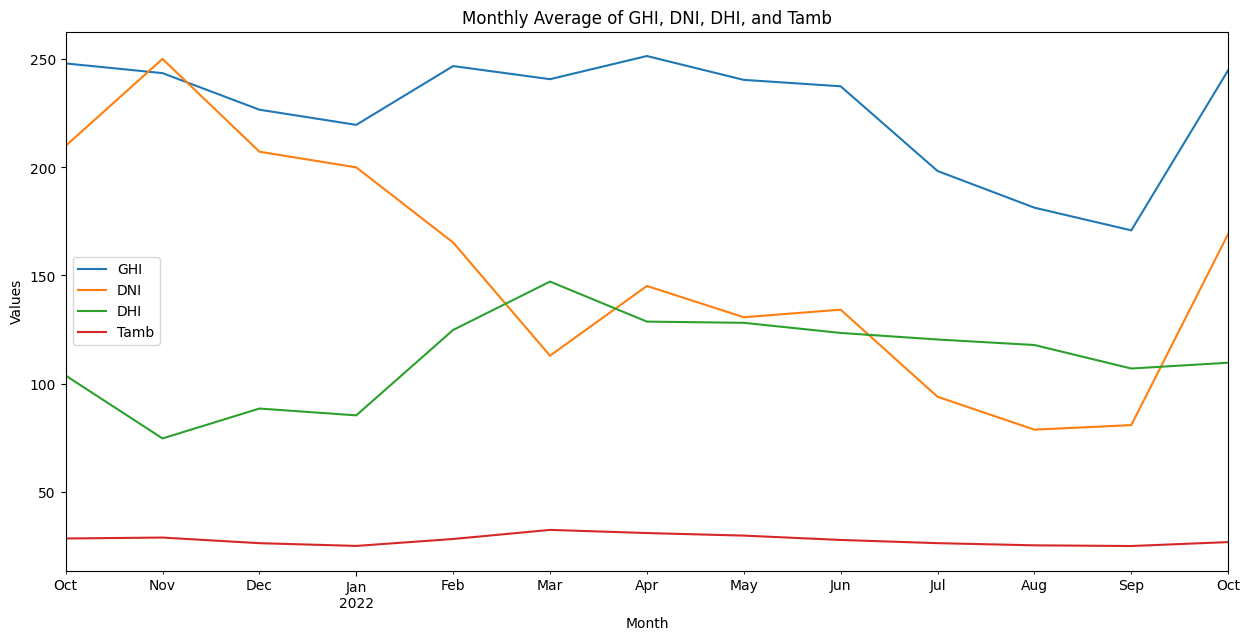

In [22]:
# Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 
# This can help identify seasonal variations or unusual weather events affecting solar energy generation.
monthly_avg = df_clean.resample('M').mean()
monthly_avg[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 7))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.show()

# Cleaning Impact

In [24]:
# Group by Cleaning flag and plot average ModA & ModB pre/post-clean.
# Cleaning Impact
df_raw = pd.read_csv("./data/togo-dapaong_qc.csv")
df_cleaned = pd.read_csv("./data/togo-dapaong-clean.csv")

comp = pd.DataFrame({
    "dataset": ['Raw', 'Cleaned'],
    'ModA': [df_raw['ModA'].mean(), df_cleaned['ModA'].mean()],
    'ModB': [df_raw['ModB'].mean(), df_cleaned['ModB'].mean()]
})

comp

,dataset,ModA,ModB
0,Raw,226.144375,219.568588
1,Cleaned,219.372045,213.019459


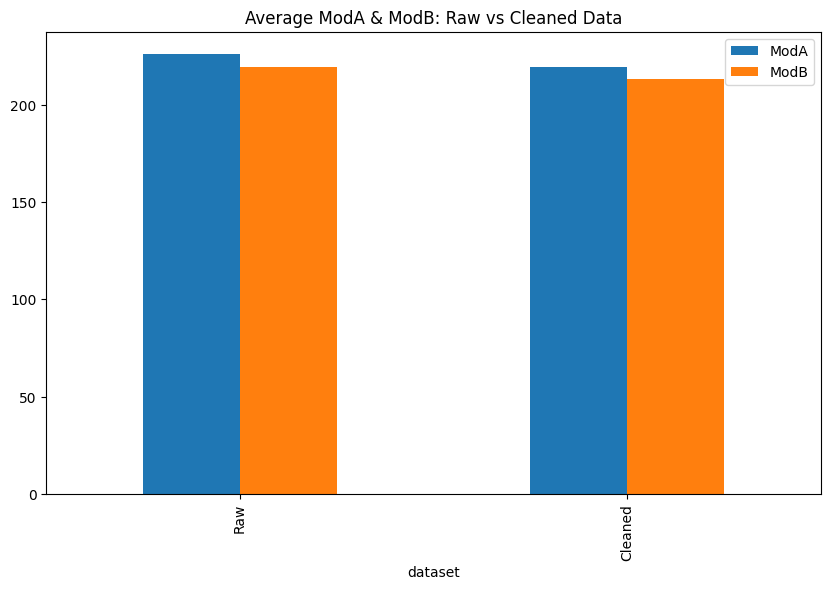

In [25]:
comp.set_index('dataset').plot(kind='bar', figsize=(10, 6))
plt.title('Average ModA & ModB: Raw vs Cleaned Data')
plt.show()

# Correlation Analysis and Relationship

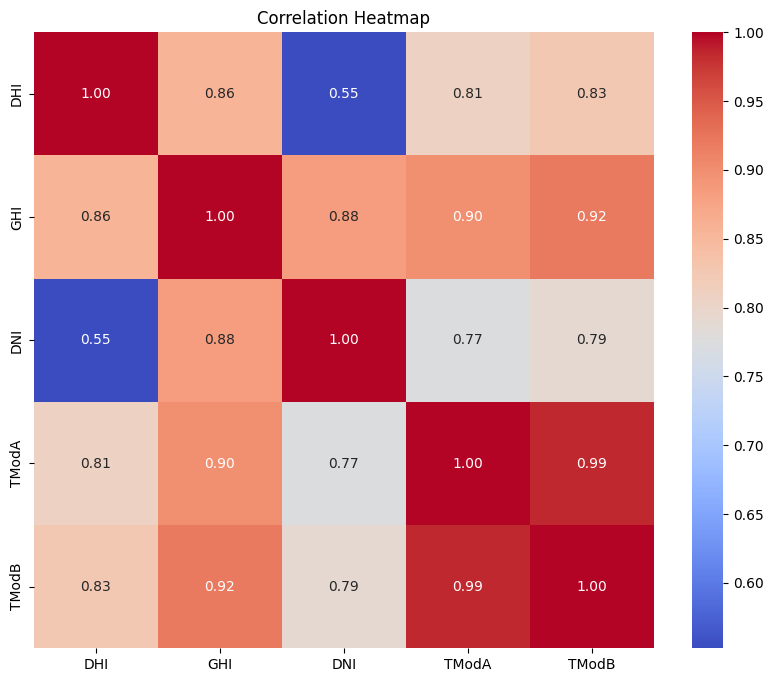

In [26]:
# Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
import seaborn as sns
corr = df_clean[["DHI", "GHI", "DNI", "TModA", "TModB"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

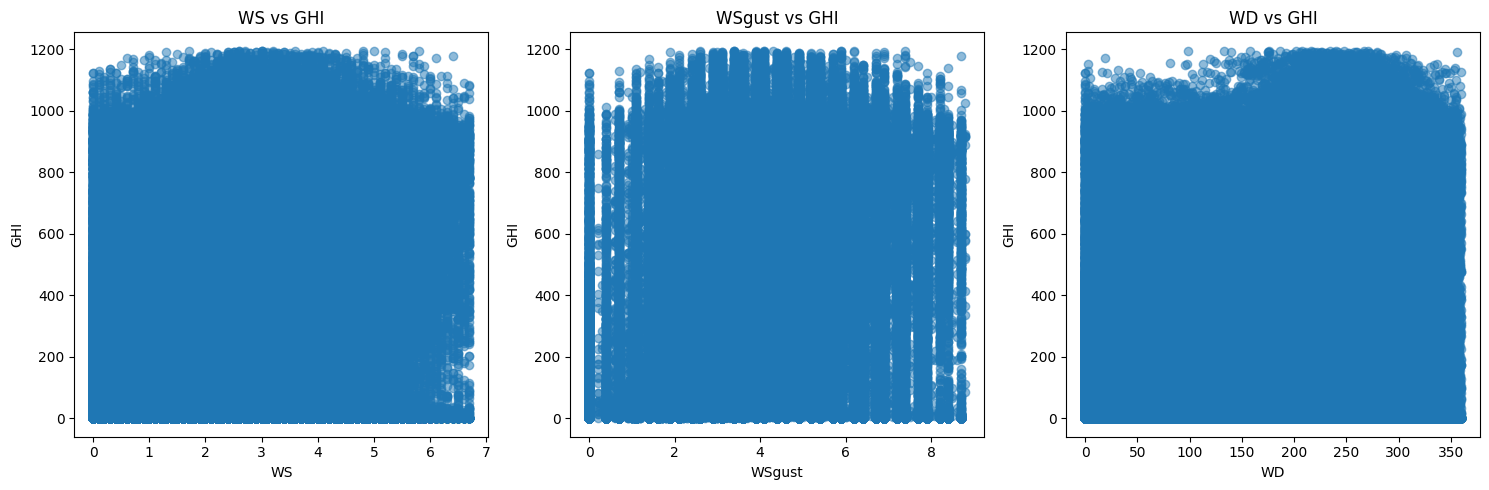

In [27]:
# Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df_clean['WS'], df_clean['GHI'], alpha=0.5)
plt.title('WS vs GHI')
plt.xlabel('WS')
plt.ylabel('GHI')

plt.subplot(1, 3, 2)
plt.scatter(df_clean['WSgust'], df_clean['GHI'], alpha=0.5)
plt.title('WSgust vs GHI')
plt.xlabel('WSgust')
plt.ylabel('GHI')

plt.subplot(1, 3, 3)
plt.scatter(df_clean['WD'], df_clean['GHI'], alpha=0.5)
plt.title('WD vs GHI')
plt.xlabel('WD')
plt.ylabel('GHI')
plt.tight_layout()

plt.show()

# Wind Distribution and Analysis

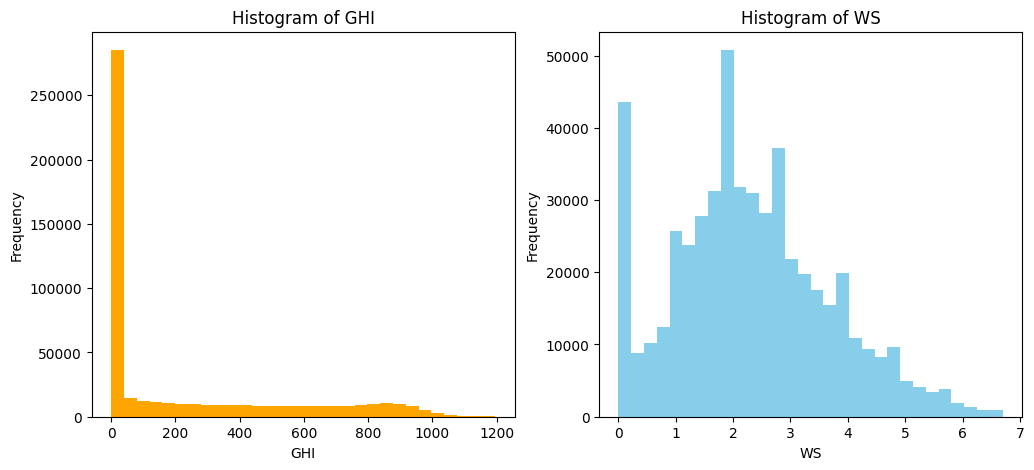

In [28]:
# histogram of GHI and WS
plt.figure(figsize=(12, 5))

# histogram of GHI
plt.subplot(1, 2, 1)
plt.hist(df_clean["GHI"], bins=30, color="orange")
plt.title("Histogram of GHI")
plt.xlabel("GHI")
plt.ylabel("Frequency")

# Historam for WS
plt.subplot(1, 2, 2)
plt.hist(df_clean["WS"], bins=30, color="skyblue")
plt.title("Histogram of WS")
plt.xlabel("WS")
plt.ylabel("Frequency")

plt.show()

# Temperature Analysis

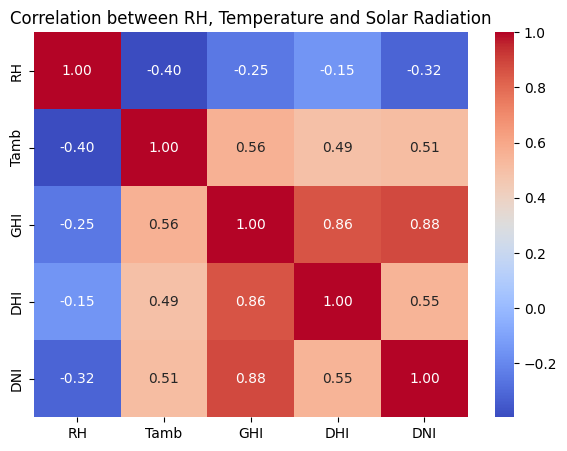

In [29]:
# Correlation matrix for RH, Tamb and Solar metrics
corr = df_clean[['RH', 'Tamb', 'GHI', 'DHI', "DNI"]].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between RH, Temperature and Solar Radiation")
plt.show()

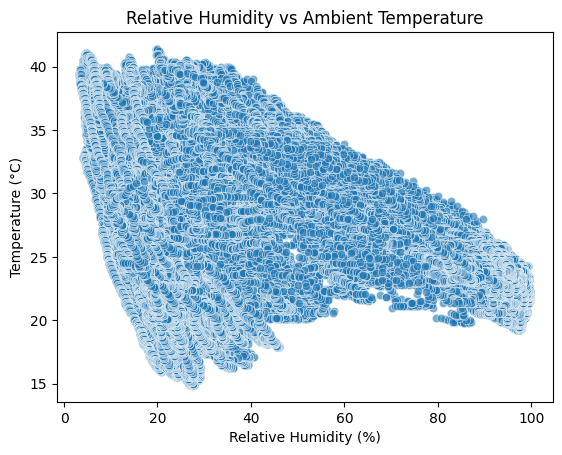

In [30]:
# RH vs Temperature
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.6)
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()

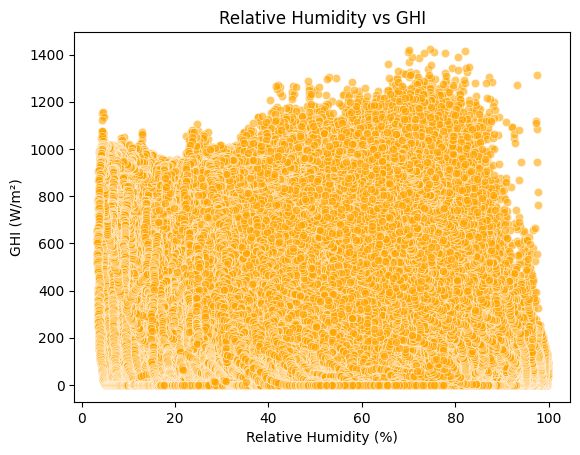

In [31]:
# RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.6, color='orange')
plt.title('Relative Humidity vs GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.show()

# Bubble Chart

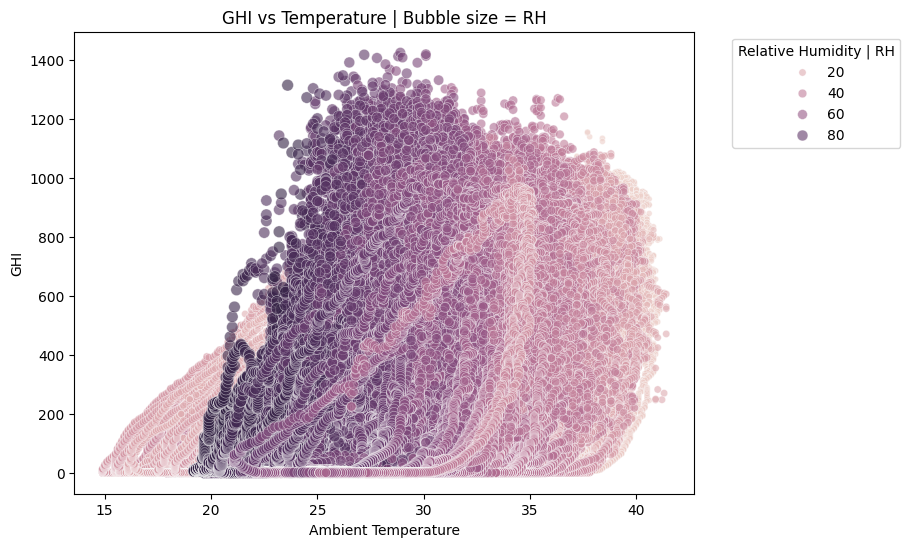

In [32]:
# GHI vs Tamb with bubble size = RH
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Tamb",
    y="GHI",
    size="RH",
    hue='RH',
    alpha=0.6,
)
plt.title("GHI vs Temperature | Bubble size = RH")
plt.xlabel("Ambient Temperature")
plt.ylabel("GHI")
plt.legend(title="Relative Humidity | RH", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# There is highest Relative Humidity between 20 - 25 degrees Celsius temperature range.